In [167]:
from distutils.log import error
import pandas as pd
from openpyxl import load_workbook
from matplotlib import pyplot as plt
import numpy as np

In [182]:
cisa_sheet = pd.read_excel("cisa-001-process.xlsx",sheet_name="CISA",header=0,index_col=None)
# Group By Vendors, Count CVE IDs per vendor & sort the counts
# Select Top 10 Vendors by number of 0-days
cisa_sheet.head(2)
cisa_sheet.shape

(737, 9)

In [181]:
vendor_cves = cisa_sheet.groupby(by=["vendorProject"], dropna=False)['cveID'].count().sort_values(ascending=False)
df_vendor_cves= vendor_cves.to_frame()
df_vendor_cves = df_vendor_cves[df_vendor_cves['cveID'] >= 10]
df_vendor_cves['Vendor'] = df_vendor_cves.index

df_vendor_cves

,cveID,Vendor
vendorProject,,
Microsoft,223,Microsoft
Cisco,57,Cisco
Adobe,46,Adobe
Apple,37,Apple
Google,30,Google
Oracle,27,Oracle
Apache,23,Apache
VMware,16,VMware
Mozilla,10,Mozilla


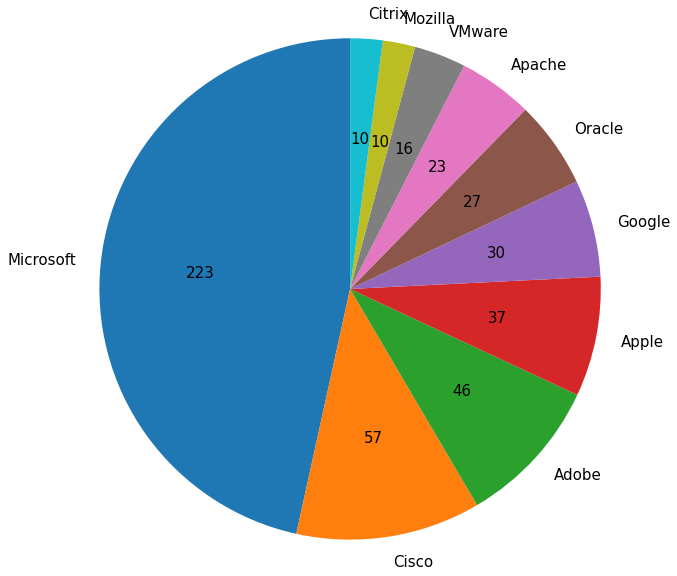

In [179]:
labels = df_vendor_cves['Vendor']
sizes = df_vendor_cves['cveID']
#explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return int(a)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=absolute_value, \
        shadow=False, startangle=90,radius=1.4,textprops={'fontsize': 15})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.set_size_inches(10, 10)


plt.show()

In [175]:
#vendor_cves = cisa_sheet.groupby(by=["vendorProject"], dropna=False)['cveID'].count().sort_values(ascending=False)
#df_vendor_cves= vendor_cves.to_frame()
#df_vendor_cves = df_vendor_cves[df_vendor_cves['cveID'] >= 10]
#df_vendor_cves['Vendor'] = df_vendor_cves.index
#df_vendor_cves
top10_labels = df_vendor_cves['Vendor']
cisa_top10_sheet = cisa_sheet[(cisa_sheet.vendorProject.isin(top10_labels))]
cisa_top10_sheet.to_csv('top10_cisa.csv')
cisa_top10_sheet

,cveID,vendorProject,product,vulnerabilityName,dateAdded,shortDescription,requiredAction,dueDate,notes
4,CVE-2021-21017,Adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN
5,CVE-2021-28550,Adobe,Acrobat and Reader,Adobe Acrobat and Reader Use-After-Free Vulner...,2021-11-03,Acrobat Reader DC versions versions 2021.001.2...,Apply updates per vendor instructions.,2021-11-17,NaN
6,CVE-2018-4939,Adobe,ColdFusion,Adobe ColdFusion Deserialization of Untrusted ...,2021-11-03,Adobe ColdFusion Update 5 and earlier versions...,Apply updates per vendor instructions.,2022-05-03,NaN
7,CVE-2018-15961,Adobe,ColdFusion,Adobe ColdFusion Remote Code Execution,2021-11-03,Adobe ColdFusion versions July 12 release (201...,Apply updates per vendor instructions.,2022-05-03,NaN
8,CVE-2018-4878,Adobe,Flash Player,Adobe Flash Player Use-After-Free Vulnerability,2021-11-03,A use-after-free vulnerability was discovered ...,The impacted product is end-of-life and should...,2022-05-03,NaN
...,...,...,...,...,...,...,...,...,...
730,CVE-2013-0431,Oracle,Java Runtime Environment (JRE),Oracle JRE Sandbox Bypass Vulnerability,2022-05-25,Unspecified vulnerability in the Java Runtime ...,Apply updates per vendor instructions.,2022-06-15,NaN
731,CVE-2013-0422,Oracle,Java Runtime Environment (JRE),Oracle JRE Remote Code Execution Vulnerability,2022-05-25,A vulnerability in the way Java restricts the ...,Apply updates per vendor instructions.,2022-06-15,NaN
732,CVE-2013-0074,Microsoft,Silverlight,Microsoft Silverlight Double Dereference Vulne...,2022-05-25,Microsoft Silverlight does not properly valida...,The impacted product is end-of-life and should...,2022-06-15,NaN
733,CVE-2012-1710,Oracle,Fusion Middleware,Oracle Fusion Middleware Unspecified Vulnerabi...,2022-05-25,Unspecified vulnerability in the Oracle WebCen...,Apply updates per vendor instructions.,2022-06-15,NaN


In [172]:
df_top_ven_top_prod = pd.DataFrame(columns=['Vendor', 'Product','cveID'])

top10_labels = df_vendor_cves['Vendor']
for label in top10_labels:
    #print(label)
    vendor_specific = cisa_top10_sheet[cisa_top10_sheet['vendorProject'] == label].groupby(by=["product"], dropna=False)['cveID'].count().sort_values(ascending=False)
    df_vendor_specific = vendor_specific.to_frame()
    df_vendor_specific['Product'] = df_vendor_specific.index
    df_vendor_specific['Vendor'] =  label
    #print(df_vendor_specific.head(3))
    df_top_ven_top_prod = pd.concat([df_top_ven_top_prod,df_vendor_specific.head(3)])

 
df_top_ven_top_prod = df_top_ven_top_prod.reset_index() 
del df_top_ven_top_prod['index']
# Setting Columns Types of Product
# Set all to None
df_top_ven_top_prod['Type'] = 'None'
# Set individual Column values
type_values = [
'Operating System','Web Browser','Driver Software',
'Operating System','Operating System','Operating System',
'Browser Extension','Software Development','Desktop Publishing',
'Operating System','Operating System','Operating System',
'Web Browser','Web Browser','Web Browser',
'Software Development', 'Application Runtime','Web Server',
'Software Development','Web Server','Web Server',
'Virtualization Software','Virtualization Software','Virtualization Software',
'Web Browser','Web Browser','Software Development',  
'Networking Software','Networking Software','Networking Software'    
              ]

df_top_ven_top_prod['Type'] = type_values
df_top_ven_top_prod

,Vendor,Product,cveID,Type
0,Microsoft,Windows,77,Operating System
1,Microsoft,Internet Explorer,23,Web Browser
2,Microsoft,Win32k,20,Driver Software
3,Cisco,IOS and IOS XE Software,13,Operating System
4,Cisco,IOS XR,6,Operating System
5,Cisco,IOS software,6,Operating System
6,Adobe,Flash Player,24,Browser Extension
7,Adobe,ColdFusion,7,Software Development
8,Adobe,Reader and Acrobat,6,Desktop Publishing
9,Apple,iOS,13,Operating System


In [173]:
df_top_prod_cves = pd.pivot_table(df_top_ven_top_prod, index=['Type'], 
               aggfunc={'Type': len, 'cveID': np.sum}
).rename(columns={'Type': 'Count'})
df_top_prod_cves['Type'] = df_top_prod_cves.index
df_top_prod_cves

,Count,cveID,Type
Type,,,
Application Runtime,1,4,Application Runtime
Browser Extension,1,24,Browser Extension
Desktop Publishing,1,6,Desktop Publishing
Driver Software,1,20,Driver Software
Networking Software,3,6,Networking Software
Operating System,7,124,Operating System
Software Development,4,20,Software Development
Virtualization Software,3,7,Virtualization Software
Web Browser,6,57,Web Browser


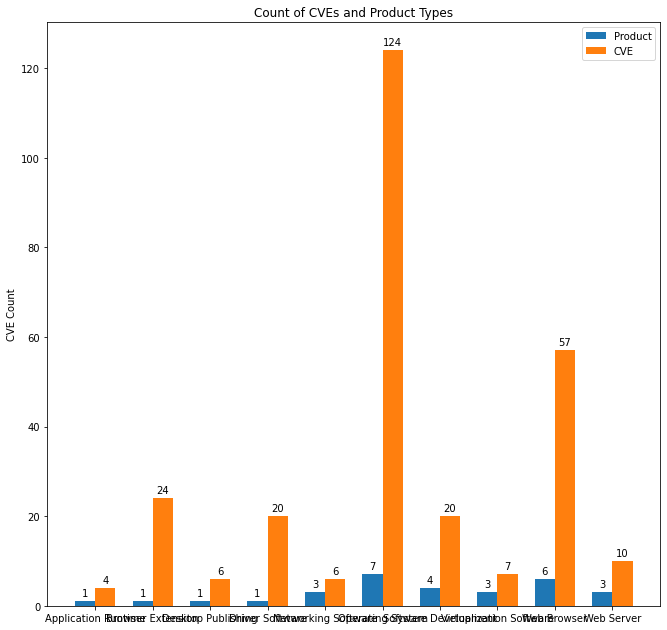

In [183]:
import matplotlib.pyplot as plt
import numpy as np


labels = df_top_prod_cves['Type']
men_means = df_top_prod_cves['Count']
women_means = df_top_prod_cves['cveID']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Product')
rects2 = ax.bar(x + width/2, women_means, width, label='CVE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('CVE Count')
ax.set_title('Count of CVEs and Product Types')
ax.set_xticks(x, labels,rotation=0)
ax.legend()
#plt.xticks(rotation=90)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
fig.set_size_inches(10, 10)

plt.show()

   dateAdded  Count  Total
0 2021-11-01    176    176
1 2021-12-01      5    181
2 2022-01-01     16    197
3 2022-02-01     25    222
4 2022-03-01    166    388
5 2022-04-01     24    412
6 2022-05-01     67    479


C:\Users\320104503\AppData\Local\Temp\ipykernel_7780\3411838210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cves_by_date['dateAdded'] = pd.to_datetime(df_cves_by_date['dateAdded'])
C:\Users\320104503\AppData\Local\Temp\ipykernel_7780\3411838210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cves_by_date['dateAdded'] = df_cves_by_date['dateAdded'].dt.strftime('%m/%Y')
C:\Users\320104503\AppData\Local\Temp\ipykernel_7780\3411838210.py:4: SettingWithCopyWarning: 
A value is trying to be set 

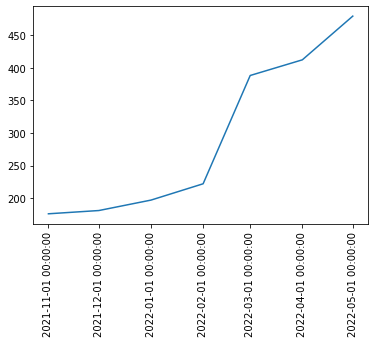

In [166]:
df_cves_by_date = cisa_top10_sheet
df_cves_by_date['dateAdded'] = pd.to_datetime(df_cves_by_date['dateAdded'])
df_cves_by_date['dateAdded'] = df_cves_by_date['dateAdded'].dt.strftime('%m/%Y')
df_cves_by_date['dateAdded'] = pd.to_datetime(df_cves_by_date['dateAdded'])
#df_cves_by_date

df_cves_by_date = pd.pivot_table(df_cves_by_date, index=['dateAdded'], 
               aggfunc={'dateAdded': len}
).rename(columns={'dateAdded': 'Count'})

df_cves_by_date = df_cves_by_date.reset_index()
df_cves_by_date.sort_values(by='dateAdded')

df_cves_by_date['Total'] =  df_cves_by_date['Count']

for index_val in range(df_cves_by_date.shape[0]):
    if index_val != 0:
        df_cves_by_date.at[index_val,'Total'] = df_cves_by_date.at[index_val,'Count'] + df_cves_by_date.at[index_val-1,'Total']
    
print(df_cves_by_date)    

y = np.array(df_cves_by_date['Total'])
x = np.array(df_cves_by_date['dateAdded'])
labels = df_cves_by_date['dateAdded']
plt.xticks(x,labels,rotation=90)
plt.plot(x, y)
ax.set_ylabel('Count of CVEs')
ax.set_title('Plot of CVEs and Date Added')
ax.set_xlabel('CVE Added Date')

plt.show()